In [8]:
import pandas as pd
import Useful_functions_for_stations
import matplotlib.pyplot as plt

In [3]:
bluebikes_idletime = pd.read_csv('C:/Users/lauri/PycharmProjects/DSML_Data/bluebikes_idle_time.csv')
bluebikes_idletime.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59


In [4]:
bluebikes_stations = pd.read_csv('C:/Users/lauri/PycharmProjects/DSML_Data/bluebikes_stations.csv')
bluebikes_stations.head()

,station_id,lat,lon
0,67,42.358100,-71.093198
1,139,42.361780,-71.108100
2,36,42.349792,-71.077338
3,10,42.350406,-71.108279
4,9,42.351187,-71.115852


Plot station map to show the current station network


In [7]:
Useful_functions_for_stations.map_stations_all_cords(bluebikes_stations)

TypeError: Location should be a sized variable, for example a list or a tuple, instead got 67 of type <class 'int'>.

Bar chart which shows number of trips originating from each station


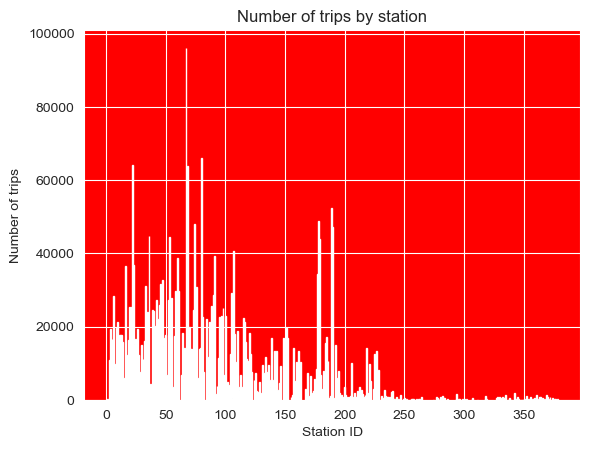

In [12]:
trips_per_station = bluebikes_idletime.groupby('start_station_id').size()
plt.rcParams['axes.facecolor'] = 'red'
plt.bar(trips_per_station.index, trips_per_station.values)
plt.xlabel('Station ID')
plt.ylabel('Number of trips')
plt.title('Number of trips by station')

plt.show()



Bar chart displaying total number of bikes available at each station

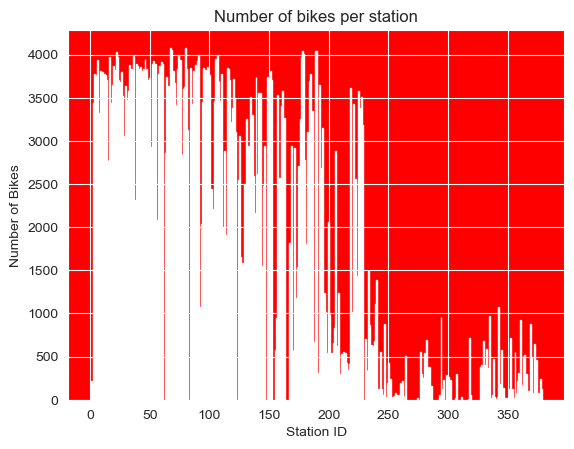

In [13]:
# Calculate number of unique bikes
bikes_per_station = bluebikes_idletime.groupby('start_station_id')['bike_id'].nunique()

plt.bar(bikes_per_station.index, bikes_per_station.values)
plt.xlabel('Station ID')
plt.ylabel('Number of Bikes')
plt.title("Number of bikes per station")
plt.show()

Visualize growth or decline of station usage with an area chart

In [ ]:
bluebikes_idletime['start_time'] = pd.to_datetime(bluebikes_idletime['start_time'])
# Sort the data by the start_time
bluebikes_idletime = bluebikes_idletime.sort_values('start_time')

rentals = bluebikes_idletime['start_time'].value_counts().sort_index().cumsum()

#Create area chart
plt.fill_between(rentals.index, rentals.values)
plt.xlabel("Time")
plt.ylabel("Cumulative bike rentals")
plt.title("Cumulative bike rentals over time")
plt.xticks(rotation = 45)
plt.show()

Error in callback <function flush_figures at 0x00000295835C45E0> (for post_execute):


KeyboardInterrupt: 